In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# plt.style.use('./deeplearning.mplstyle')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
RANDOM_STATE = 55
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [41]:
def normalize(x):
    mu = np.mean(x)
    std = np.std(x)
    x = (x-mu)/std
    
    return x

In [42]:
# Define the direct path to the CSV file
path = "heart.csv"

# Read the CSV file
df = pd.read_csv(path)

# Display the DataFrame
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [43]:
columns = [
    "Sex",
    "ChestPainType",
    "RestingECG",
     "ExerciseAngina",
    "ST_Slope"
]
df = pd.get_dummies(df, prefix = columns  , columns = columns , dtype = float)

In [44]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [45]:
target = df["HeartDisease"]
features = df.drop("HeartDisease", axis = 1)

In [46]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [47]:
len(features.columns)

20

In [48]:
X_train , X_val, y_train, y_val = train_test_split(features, target, train_size = 0.8)

In [49]:
X_train_norm = normalize(np.array(X_train))
X_val_norm = normalize(np.array(X_val))

In [50]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

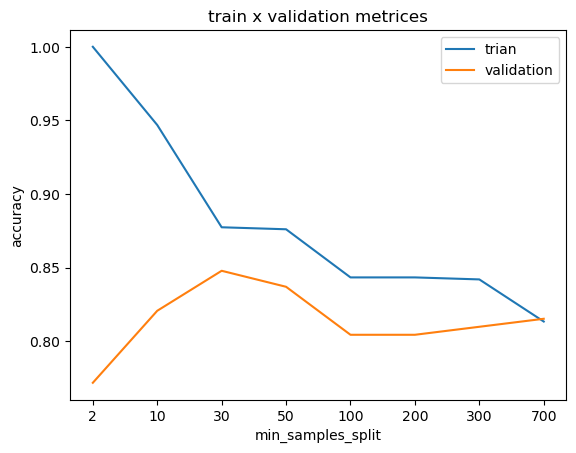

In [51]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples).fit(X_train_norm, y_train)
    train_pred = model.predict(X_train_norm)
    val_pred = model.predict(X_val_norm)
    accuracy_list_train.append(accuracy_score(train_pred, y_train))
    accuracy_list_val.append(accuracy_score(val_pred, y_val))
    
    
plt.title("train x validation metrices")
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(["trian", "validation"])

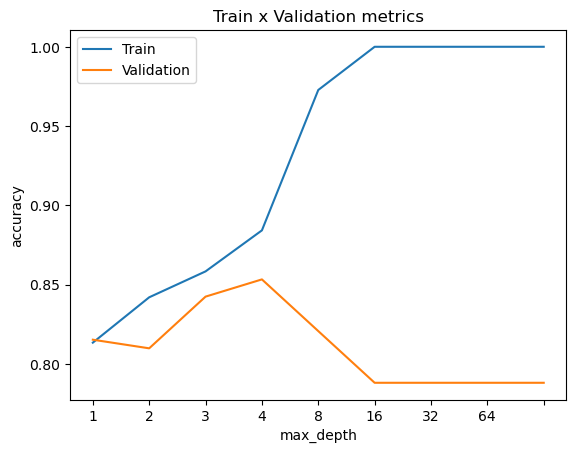

In [52]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [53]:
max_depth = 4
min_samples_split = 50

In [54]:
decision_tree_model = DecisionTreeClassifier(max_depth = 4, min_samples_split = 50)
decision_tree_model.fit(X_train_norm, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=50)

In [55]:
prediction = decision_tree_model.predict(X_val_norm)

In [56]:
print(f"Accuracy is {accuracy_score(prediction, y_val)}")

Accuracy is 0.8369565217391305


In [57]:
#Now lets try Randomforest 
n_estimators_list = [10,50,100,500]

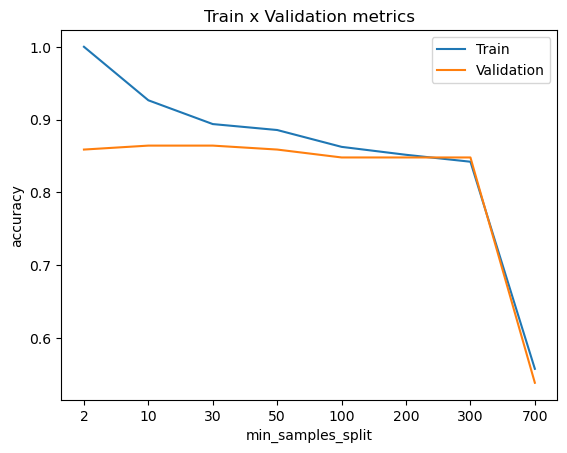

In [58]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

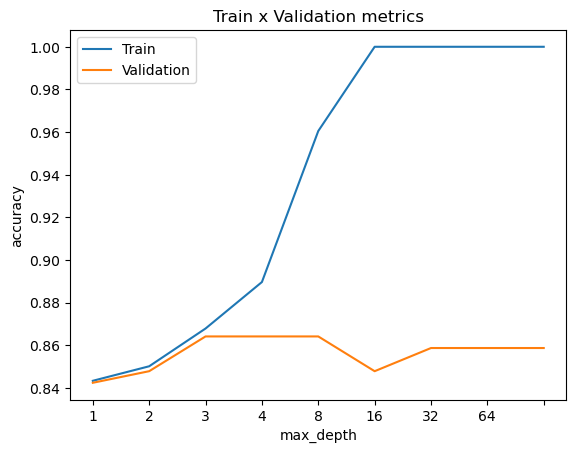

In [59]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

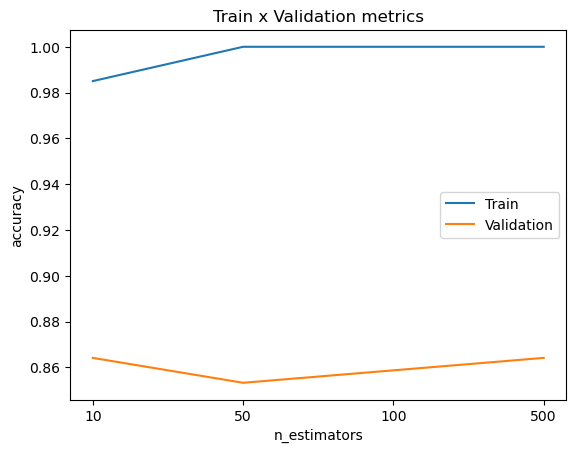

In [60]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [61]:
"""max_depht = 4
min_samples_split = 10
n_estimators = 100"""

'max_depht = 4\nmin_samples_split = 10\nn_estimators = 100'

In [62]:
#lets fit randomforest with above parameters
random_forest_model = RandomForestClassifier(max_depth = 16, 
                                            min_samples_split = 10,
                                            n_estimators = 100).fit(X_train_norm, y_train)

In [63]:
predictions_train = random_forest_model.predict(X_train_norm)

In [64]:
print("training accuracy is {}".format(accuracy_score(predictions_train, y_train)))

training accuracy is 0.9346049046321526


In [65]:
predictions_val = random_forest_model.predict(X_val_norm)

In [66]:
print(f"accuracy is {accuracy_score(predictions_val, y_val)}")

accuracy is 0.8586956521739131


In [73]:
#lets use XGBoost model 
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1, verbosity = 1)
xgb_model.fit(X_train_norm, y_train, eval_set = [(X_val_norm, y_val)], early_stopping_rounds = 10)

[0]	validation_0-logloss:0.69313
[1]	validation_0-logloss:0.69899
[2]	validation_0-logloss:0.69632
[3]	validation_0-logloss:0.70420
[4]	validation_0-logloss:0.70629
[5]	validation_0-logloss:0.70665
[6]	validation_0-logloss:0.70118
[7]	validation_0-logloss:0.69927
[8]	validation_0-logloss:0.70226
[9]	validation_0-logloss:0.70215
[10]	validation_0-logloss:0.70858


C:\Users\sony\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
predictions = xgb_model.predict(X_val_norm)

In [75]:
print("accuracy of xgb model is {}".format(accuracy_score(predictions, y_val)))

accuracy of xgb model is 0.5380434782608695


In [76]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [77]:
from tkinter import *

In [78]:
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.decomposition import PCA
pca=PCA(n_components=0.90)

In [79]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import joblib

# Load the pre-trained machine learning model
model = joblib.load('wine_quality_predict')

# Create the main application window
app = tk.Tk()
app.title("Wine Quality Predictor")

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('heart.csv')

# Function to make predictions
def predict_heart_disease():
    try:
        # Get user inputs from entry fields and convert to appropriate data types
        age = int(entry_fields['Age'].get())
        sex = entry_fields['Sex'].get()
        resting_bp = int(entry_fields['RestingBP'].get())
        fasting_bs = int(entry_fields['FastingBS'].get())
        resting_ecg = entry_fields['RestingECG'].get()
        max_hr = int(entry_fields['MaxHR'].get())
         
#     finally: 
#         if resting_bp<=90 & resting_bp>=120:
#             messagebox.showerror("Error", "Please enter valid resting_bp.")
        # Create a dictionary with input data
        input_data = {
            'Age': [age],
            'RestingBP': [resting_bp],
            'FastingBS': [fasting_bs],
            'RestingECG': [resting_ecg],
            'MaxHR': [max_hr],
        }

        # Create a DataFrame from the input data
        input_df = pd.DataFrame(input_data)

        # Make a prediction using the loaded model
        predicted_disease = model.predict(input_df)[0]

        # Convert the predicted disease to a human-readable label
        predicted_label = "Present" if predicted_disease == 1 else "Not Present"

        # Display the predicted heart disease status
        messagebox.showinfo("Prediction Result", f"Heart Disease Status: {predicted_label}")
        
    except ValueError:
        # Handle non-integer or non-float input or other errors
        messagebox.showerror("Error", "Please enter valid numeric values.")

# Create labels and entry fields for heart characteristics
characteristics = [
    'Age', 'Sex', 'RestingBP',
    'FastingBS', 'RestingECG', 'MaxHR'
]
entry_fields = {}

for char in characteristics:
    label = tk.Label(app, text=char)
    label.pack()
    entry = tk.Entry(app)
    entry.pack()
    entry_fields[char] = entry

# Create a predict button
predict_button = tk.Button(app, text="Predict Heart Disease", command=predict_heart_disease)
predict_button.pack()

# Start the GUI application
app.mainloop()


FileNotFoundError: [Errno 2] No such file or directory: 'wine_quality_predict8'

In [ ]:
print(input_df)